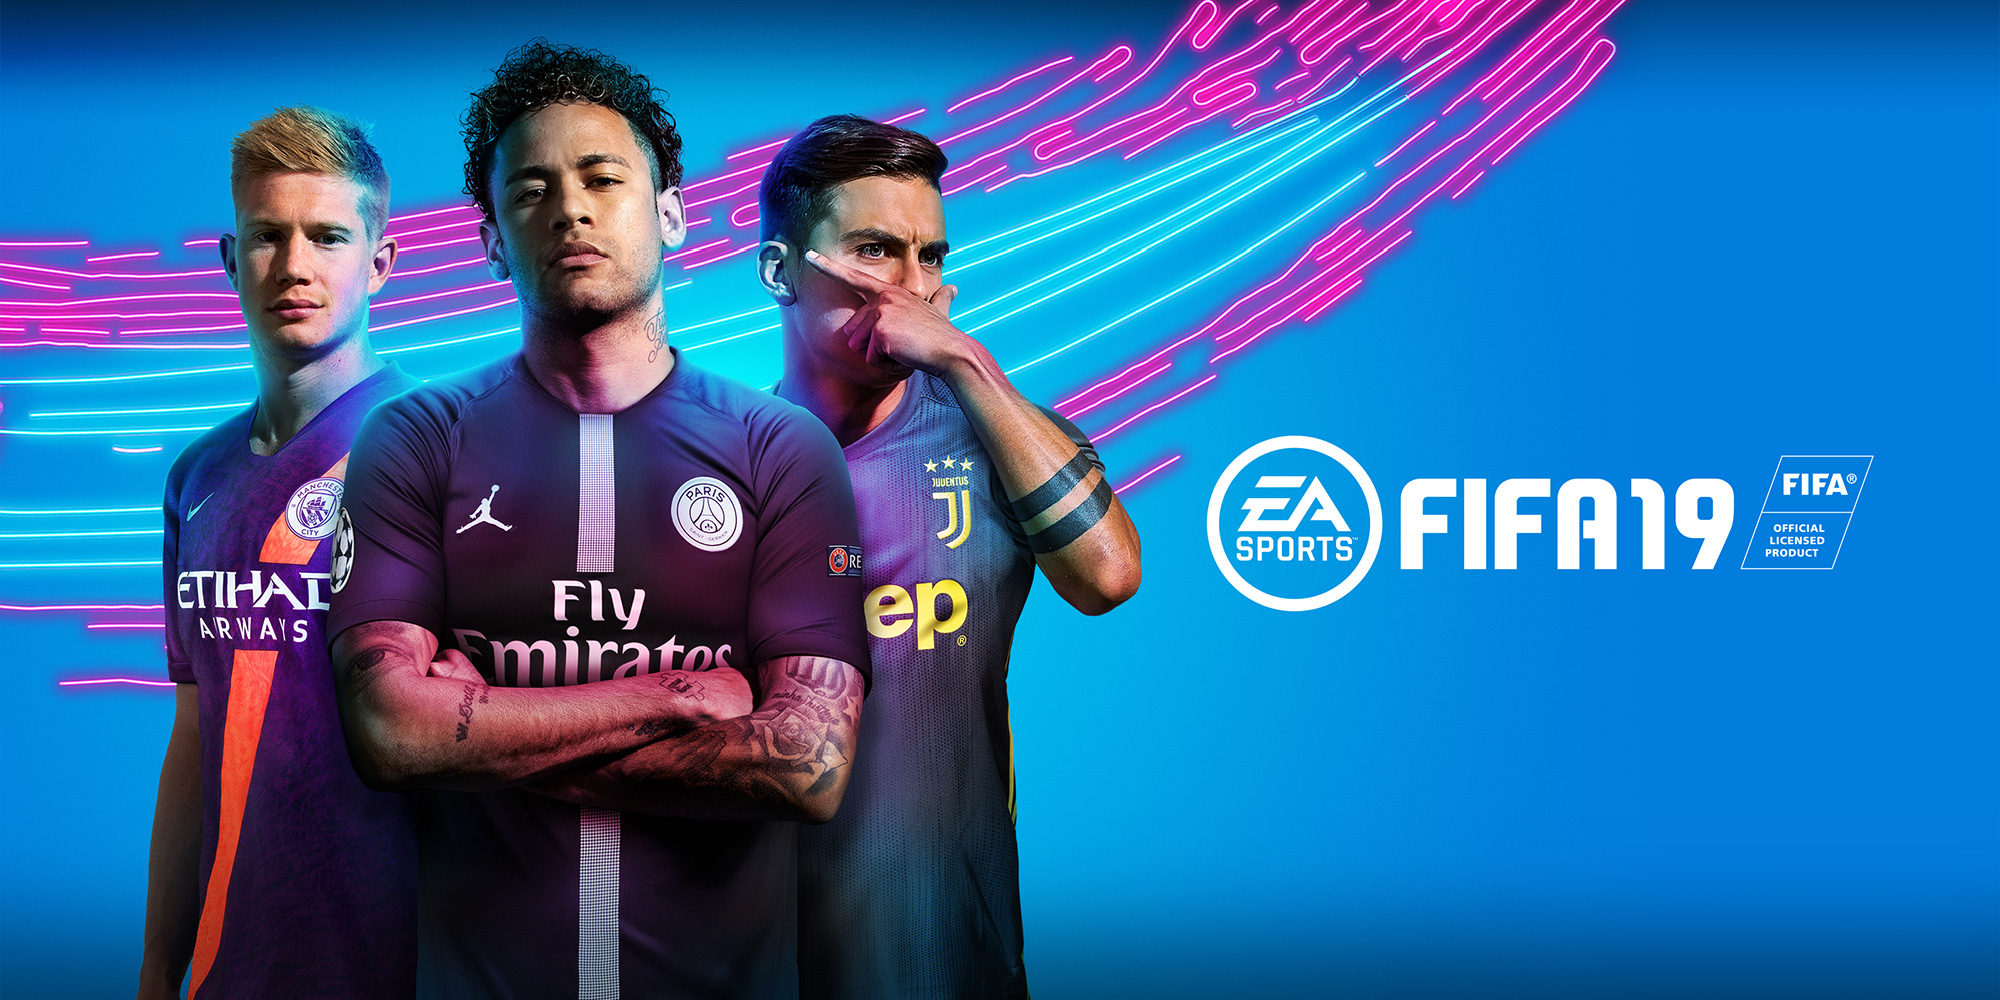

In [1]:
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
fifa19 = pd.read_csv('./data/fifa19.csv')
fifa19.head(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [3]:
fifa19.shape

(18207, 89)

In [5]:
fifa19 = fifa19.drop('Unnamed: 0', 1)
fifa19.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

## Lidar com os Nulos

In [12]:
# Separar somente os nulos
null_value_stats = fifa19.isnull().sum(axis=0)
null_value_stats[null_value_stats > 0]

Series([], dtype: int64)

In [8]:
# Trocar alguns dos nulos por 0
fifa19['Value'].fillna(0, inplace=True)
fifa19['Release Clause'].fillna(0, inplace=True)
fifa19['Loaned From'].fillna('', inplace=True)
fifa19['Joined'].fillna(0, inplace=True)
fifa19['Club'].fillna('', inplace=True)
fifa19['Position'].fillna('', inplace=True)
fifa19['Jersey Number'].fillna(-1, inplace=True)
fifa19['Contract Valid Until'].fillna(0, inplace=True)

In [9]:
# Eliminar colunas sem interesse
fifa19 = fifa19.drop(['LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM','LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB'], axis=1)

In [10]:
# Eliminar os outros
fifa19 = fifa19.dropna(axis=0)
fifa19.shape

(18159, 62)

## Por Idade

In [13]:
# Jogadores mais Velhos
fifa19.sort_values(by=['Age'], ascending=False, inplace=True)
fifa19.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
4741,140029,O. Pérez,45,https://cdn.sofifa.org/players/4/19/140029.png,Mexico,https://cdn.sofifa.org/flags/83.png,71,71,Pachuca,https://cdn.sofifa.org/teams/2/light/110147.png,...,62.0,23.0,12.0,11.0,70.0,64.0,65.0,73.0,74.0,€272K
18183,53748,K. Pilkington,44,https://cdn.sofifa.org/players/4/19/53748.png,England,https://cdn.sofifa.org/flags/14.png,48,48,Cambridge United,https://cdn.sofifa.org/teams/2/light/1944.png,...,56.0,15.0,15.0,13.0,45.0,48.0,44.0,49.0,46.0,0
17726,51963,T. Warner,44,https://cdn.sofifa.org/players/4/19/51963.png,Trinidad & Tobago,https://cdn.sofifa.org/flags/93.png,53,53,Accrington Stanley,https://cdn.sofifa.org/teams/2/light/110313.png,...,46.0,19.0,15.0,14.0,48.0,56.0,56.0,60.0,44.0,0
10545,140183,S. Narazaki,42,https://cdn.sofifa.org/players/4/19/140183.png,Japan,https://cdn.sofifa.org/flags/163.png,65,65,Nagoya Grampus,https://cdn.sofifa.org/teams/2/light/112092.png,...,45.0,27.0,24.0,22.0,64.0,63.0,62.0,67.0,63.0,€50K
15426,18745,M. Tyler,41,https://cdn.sofifa.org/players/4/19/18745.png,England,https://cdn.sofifa.org/flags/14.png,59,59,Peterborough United,https://cdn.sofifa.org/teams/2/light/1938.png,...,57.0,24.0,16.0,17.0,61.0,54.0,54.0,63.0,55.0,€18K


In [14]:
# Jogadores mais novos
fifa19.sort_values(by=['Age'], ascending=True, inplace=True)
fifa19.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
18206,246269,G. Nugent,16,https://cdn.sofifa.org/players/4/19/246269.png,England,https://cdn.sofifa.org/flags/14.png,46,66,Tranmere Rovers,https://cdn.sofifa.org/teams/2/light/15048.png,...,43.0,40.0,43.0,50.0,10.0,15.0,9.0,12.0,9.0,€165K
17757,246315,L. Smyth,16,https://cdn.sofifa.org/players/4/19/246315.png,Northern Ireland,https://cdn.sofifa.org/flags/35.png,52,73,Stevenage,https://cdn.sofifa.org/teams/2/light/361.png,...,45.0,19.0,16.0,14.0,14.0,5.0,7.0,7.0,5.0,€303K
12828,246465,Guerrero,16,https://cdn.sofifa.org/players/4/19/246465.png,Spain,https://cdn.sofifa.org/flags/45.png,63,76,CF Rayo Majadahonda,https://cdn.sofifa.org/teams/2/light/110066.png,...,55.0,56.0,64.0,58.0,6.0,5.0,10.0,6.0,14.0,€1.4M
15746,243169,Y. Begraoui,16,https://cdn.sofifa.org/players/4/19/243169.png,France,https://cdn.sofifa.org/flags/18.png,59,81,AJ Auxerre,https://cdn.sofifa.org/teams/2/light/57.png,...,55.0,13.0,18.0,20.0,9.0,9.0,14.0,12.0,5.0,€980K
13567,246419,Y. Verschaeren,16,https://cdn.sofifa.org/players/4/19/246419.png,Belgium,https://cdn.sofifa.org/flags/7.png,62,83,RSC Anderlecht,https://cdn.sofifa.org/teams/2/light/229.png,...,50.0,35.0,38.0,35.0,15.0,6.0,12.0,10.0,7.0,€1.6M


In [15]:
# Média
fifa19.Age.mean()

25.12252877361088

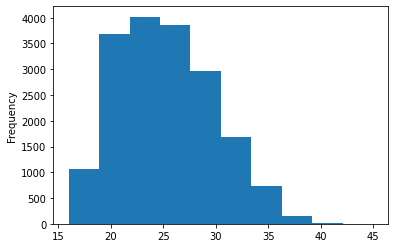

In [16]:
# Histograma
fifa19.Age.plot(kind='hist')

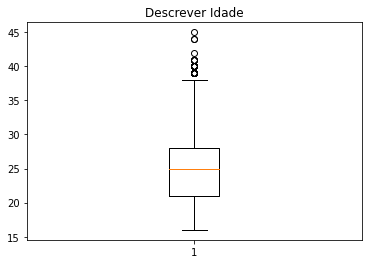

In [28]:
# Descrever Idade
# fifa19.Age.describe()
fig1, ax1 = plt.subplots()
ax1.set_title('Descrever Idade')
ax1.boxplot(fifa19.Age)
fig1.show()

# Por País

In [18]:
top10 = fifa19.groupby('Nationality').count().sort_values(by=['Name'], ascending=False).head(10)
top10

,ID,Name,Age,Photo,Flag,Overall,Potential,Club,Club Logo,Value,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Nationality,,,,,,,,,,,,,,,,,,,,,
England,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657,...,1657,1657,1657,1657,1657,1657,1657,1657,1657,1657
Germany,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195,...,1195,1195,1195,1195,1195,1195,1195,1195,1195,1195
Spain,1071,1071,1071,1071,1071,1071,1071,1071,1071,1071,...,1071,1071,1071,1071,1071,1071,1071,1071,1071,1071
Argentina,936,936,936,936,936,936,936,936,936,936,...,936,936,936,936,936,936,936,936,936,936
France,911,911,911,911,911,911,911,911,911,911,...,911,911,911,911,911,911,911,911,911,911
Brazil,825,825,825,825,825,825,825,825,825,825,...,825,825,825,825,825,825,825,825,825,825
Italy,699,699,699,699,699,699,699,699,699,699,...,699,699,699,699,699,699,699,699,699,699
Colombia,616,616,616,616,616,616,616,616,616,616,...,616,616,616,616,616,616,616,616,616,616
Japan,478,478,478,478,478,478,478,478,478,478,...,478,478,478,478,478,478,478,478,478,478


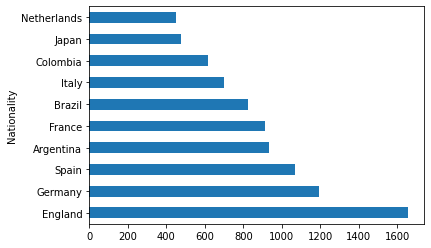

In [19]:
# Graficamente
top10['ID'].plot(kind='barh')

# Por Clube

In [20]:
fifa19.groupby('Club').count().sort_values(by='ID', ascending=False).head(20)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club Logo,Value,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Club,,,,,,,,,,,,,,,,,,,,,
,241,241,241,241,241,241,241,241,241,241,...,241,241,241,241,241,241,241,241,241,241
Burnley,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
Fortuna Düsseldorf,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
Arsenal,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
Atlético Madrid,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
Tottenham Hotspur,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
TSG 1899 Hoffenheim,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
Liverpool,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
Manchester City,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33


In [21]:
fifa19.groupby('Club').mean().sort_values(by='Overall', ascending=False).head()

,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Club,,,,,,,,,,,,,,,,,,,,,
Juventus,187675.680000,27.160000,82.280000,85.520000,1904.400000,2.520000,3.200000,2.880000,13.720000,60.680000,...,56.600000,77.800000,64.000000,62.120000,59.880000,16.760000,16.080000,15.440000,17.520000,18.000000
Napoli,203013.520000,25.920000,80.000000,83.440000,1856.960000,2.160000,3.360000,2.880000,17.200000,61.240000,...,52.400000,73.000000,59.160000,59.880000,57.840000,18.720000,16.920000,16.760000,18.800000,18.840000
Inter,192522.666667,27.458333,79.750000,81.750000,1836.958333,2.166667,3.291667,2.875000,27.583333,57.958333,...,53.500000,75.583333,59.208333,57.625000,55.583333,20.000000,19.166667,18.333333,19.375000,21.125000
Real Madrid,213881.000000,24.030303,78.242424,84.636364,1818.939394,2.090909,3.212121,2.848485,17.666667,58.606061,...,52.878788,70.303030,57.030303,56.060606,53.121212,19.000000,19.000000,17.666667,17.545455,18.636364
Milan,199943.666667,25.000000,78.074074,82.555556,1823.296296,2.111111,3.000000,2.925926,23.888889,59.777778,...,53.370370,72.777778,61.703704,56.296296,53.481481,19.777778,20.000000,18.111111,18.740741,19.037037


# Por Habilidade

In [22]:
fifa19.sort_values(by=['Overall'], ascending=False, inplace=True)
fifa19.head(5)

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M


# Por Salário

In [23]:
fifa19.Value.describe()

count     18159
unique      217
top       €1.1M
freq        431
Name: Value, dtype: object

In [24]:
# check unique value
fifa19.Value.unique()

array(['€77M', '€110.5M', '€118.5M', '€51M', '€72M', '€67M', '€93M',
       '€80M', '€102M', '€68M', '€76.5M', '€44M', '€60M', '€58M', '€78M',
       '€53.5M', '€51.5M', '€83.5M', '€63M', '€89M', '€38M', '€27M',
       '€64.5M', '€69.5M', '€59M', '€24M', '€73.5M', '€36M', '€4M',
       '€43M', '€30M', '€46M', '€62M', '€57M', '€81M', '€59.5M', '€34M',
       '€62.5M', '€64M', '€30.5M', '€45M', '€46.5M', '€52M', '€36.5M',
       '€55M', '€43.5M', '€45.5M', '€56.5M', '€21.5M', '€44.5M', '€18M',
       '€53M', '€50M', '€39M', '€35M', '€61M', '€41.5M', '€37.5M',
       '€28.5M', '€15.5M', '€9M', '€37M', '€32M', '€50.5M', '€54M',
       '€35.5M', '€22M', '€38.5M', '€40.5M', '€26M', '€33M', '€14M',
       '€42.5M', '€25M', '€19M', '€27.5M', '€29.5M', '€31.5M', '€4.2M',
       '€42M', '€23M', '€31M', '€16.5M', '€24.5M', '€29M', '€22.5M',
       '€32.5M', '€20M', '€21M', '€25.5M', '€17.5M', '€8M', '€41M',
       '€26.5M', '€34.5M', '€40M', '€6M', '€13M', '€28M', '€11.5M',
       '€15M', '€6.5M'

In [25]:
# convert value data
def convert_value(value):
    if value.endswith('K'):
        return float(value.replace('€','').replace('K','')) * 1000
    if value.endswith('M'):
        return float(value.replace('€','').replace('M','')) * 1000000
    
fifa19.Value = fifa19.Value.apply(convert_value)
fifa19.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
8,155862,Sergio Ramos,32,https://cdn.sofifa.org/players/4/19/155862.png,Spain,https://cdn.sofifa.org/flags/45.png,91,91,Real Madrid,https://cdn.sofifa.org/teams/2/light/243.png,...,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,€104.6M
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M


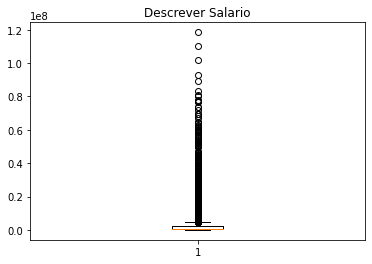

In [35]:
# fifa19.Value.describe()
fig1, ax1 = plt.subplots()
ax1.set_title('Descrever Salario')
ax1.boxplot(fifa19.Value)
fig1.show()

### Lembra dos Nulos?

In [31]:
null_value_stats = fifa19.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Value    252
dtype: int64

In [32]:
fifa19 = fifa19.dropna(axis=0)
fifa19.shape

(17907, 62)

# Direito ou Canhoto?

In [36]:
pe = fifa19.groupby('Preferred Foot').count()
pe.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
Preferred Foot,,,,,,,,,,,,,,,,,,,,,
Left,4159,4159,4159,4159,4159,4159,4159,4159,4159,4159,...,4159,4159,4159,4159,4159,4159,4159,4159,4159,4159
Right,13748,13748,13748,13748,13748,13748,13748,13748,13748,13748,...,13748,13748,13748,13748,13748,13748,13748,13748,13748,13748


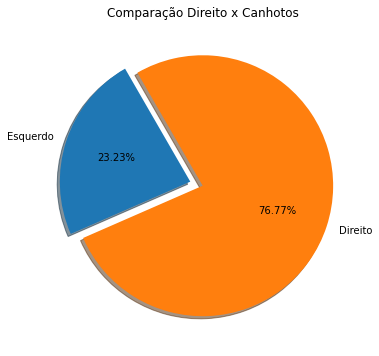

In [37]:
plt.figure(figsize=(10,6))
plt.pie([pe.ID[0], pe.ID[1]], 
        labels=['Esquerdo', 'Direito'],
        explode=(0.1, 0),
        autopct='%2.2f%%',
        shadow=True,
        startangle=120
       )
plt.title('Comparação Direito x Canhotos')
plt.show()

# Top 8 dos Modelos de Machine Learning

<span style="display:block;text-align:center">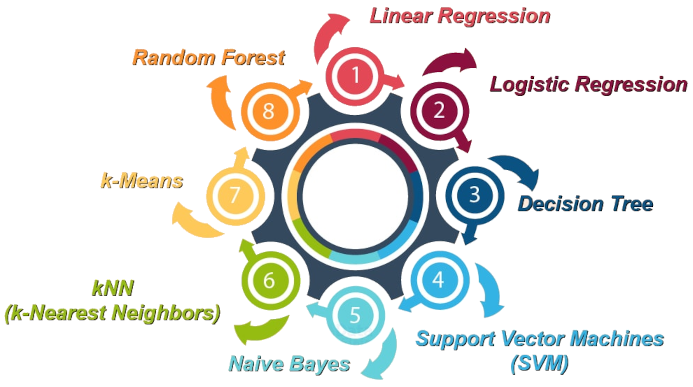</align>

In [38]:
clube = fifa19.loc[((fifa19.Club=='FC Barcelona') | (fifa19.Club=='CD Leganés')),:].reset_index()
clube.head()

,index,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,7,176580,L. Suárez,31,https://cdn.sofifa.org/players/4/19/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,91,91,FC Barcelona,...,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,€164M
2,18,192448,M. ter Stegen,26,https://cdn.sofifa.org/players/4/19/192448.png,Germany,https://cdn.sofifa.org/flags/21.png,89,92,FC Barcelona,...,69.0,25.0,13.0,10.0,87.0,85.0,88.0,85.0,90.0,€123.3M
3,20,189511,Sergio Busquets,29,https://cdn.sofifa.org/players/4/19/189511.png,Spain,https://cdn.sofifa.org/flags/45.png,89,89,FC Barcelona,...,90.0,90.0,86.0,80.0,5.0,8.0,13.0,9.0,13.0,€105.6M
4,32,189242,Coutinho,26,https://cdn.sofifa.org/players/4/19/189242.png,Brazil,https://cdn.sofifa.org/flags/54.png,88,89,FC Barcelona,...,85.0,55.0,54.0,47.0,12.0,7.0,9.0,14.0,6.0,€147.7M


In [47]:
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn import neighbors
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(font_scale=1.2)
import numpy as np

%matplotlib inline

## Agora podemos brincar...

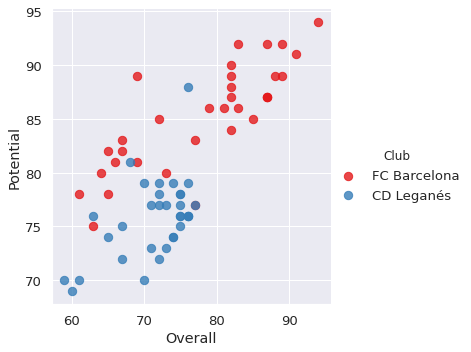

In [41]:
sns.lmplot('Overall', 'Potential', data=clube, hue='Club',
           palette='Set1', fit_reg=False, scatter_kws={"s": 70});

In [42]:
campos = clube[['Overall', 'Potential']].values
tipo = np.where(clube['Club']=='FC Barcelona', 0, 1)
tipo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [43]:
def qualClube(clf, hab, pot):
    prev = clf.predict([[hab, pot]])
    if prev == 0:
        print('FC Barcelona')
    else:
        print('CD Leganés')

# 4. SVM 
Traça uma linha que divide diferentes categorias de seus dados. Neste algoritmo calculamos o vetor para otimizar a linha. Isso é para garantir que o ponto mais próximo em cada grupo esteja mais distante um do outro.

In [44]:
clfSVM = svm.SVC(kernel='linear')
clfSVM.fit(campos, tipo)

SVC(kernel='linear')

In [45]:
qualClube(clfSVM, 80, 90)
qualClube(clfSVM, 70, 70)

FC Barcelona
CD Leganés


## 5. Modelo "Naïve Bayes"

Algoritimo Supervisionado destinado a probabilidades. Qual a probabilidade de um evento A ocorrer dado que um evento B aconteceu?

In [48]:
clfNBy = MultinomialNB()
clfNBy.fit(campos, tipo)
tipo

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1])

In [49]:
qualClube(clfNBy, 80, 90)
qualClube(clfNBy, 70, 70)

FC Barcelona
CD Leganés


## 6. Modelo "KNN - K Nearest Neighbors"
Algorítimo supervisionado destinado a Predição por Clusterização

In [50]:
clfKNN = neighbors.KNeighborsClassifier()
clfKNN.fit(campos, tipo)

KNeighborsClassifier()

In [51]:
qualClube(clfKNN, 80, 90)
qualClube(clfKNN, 70, 70)

FC Barcelona
CD Leganés


## 7. Modelo K-Means
Algorítimo não supervisionado destinado a Clusterização

In [67]:
clfKM = KMeans(n_clusters=2)
clfKM.fit(campos, tipo)

KMeans(n_clusters=2)

In [68]:
qualClube(clfKM, 80, 90)
qualClube(clfKM, 70, 70)

CD Leganés
FC Barcelona


Até a próxima \
Fernando Anselmo